In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Implement a KNN model for glass classification

# Glass Dataset

In [2]:
df = pd.read_csv(r"C:\Users\krush\Desktop\Data Science\Assignments\KNN\glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## Visualization

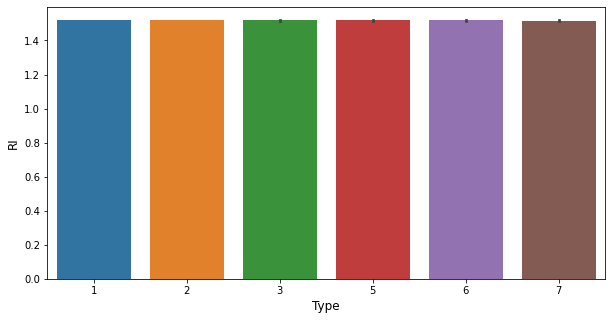

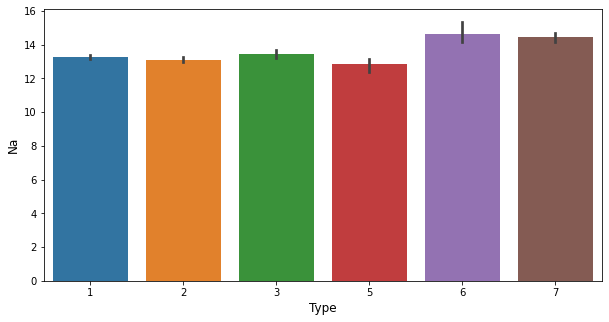

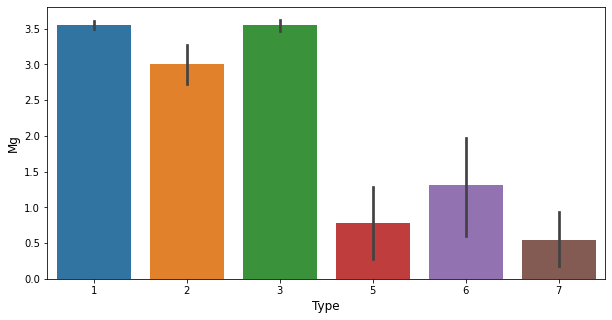

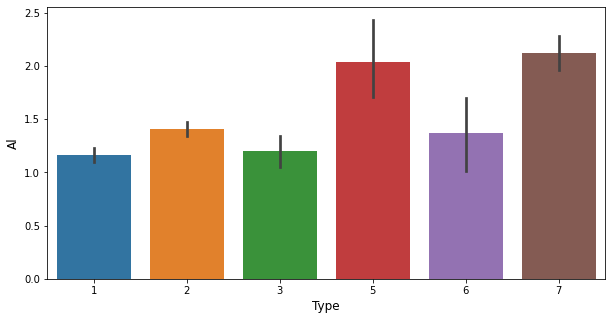

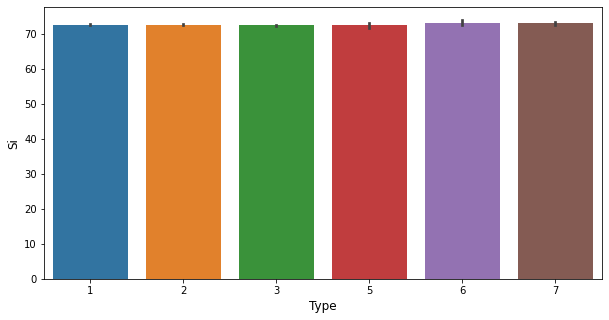

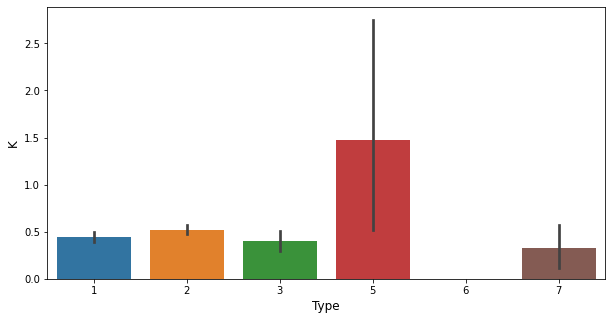

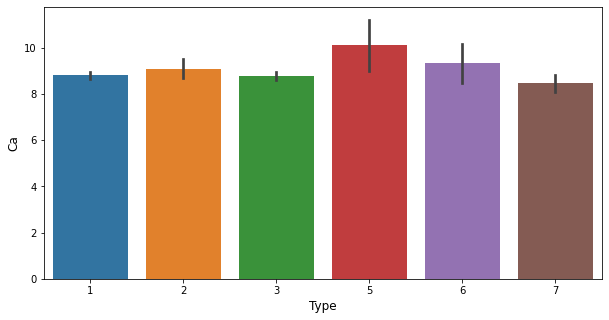

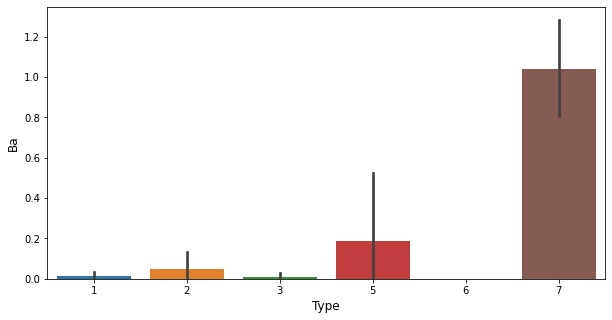

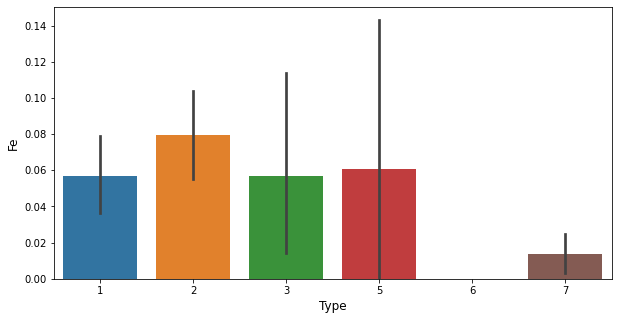

In [9]:
for i in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.barplot(x = 'Type', y=i, data=df)
    plt.xlabel('Type',fontsize=12)
    plt.ylabel(i, fontsize=12)
    plt.show()

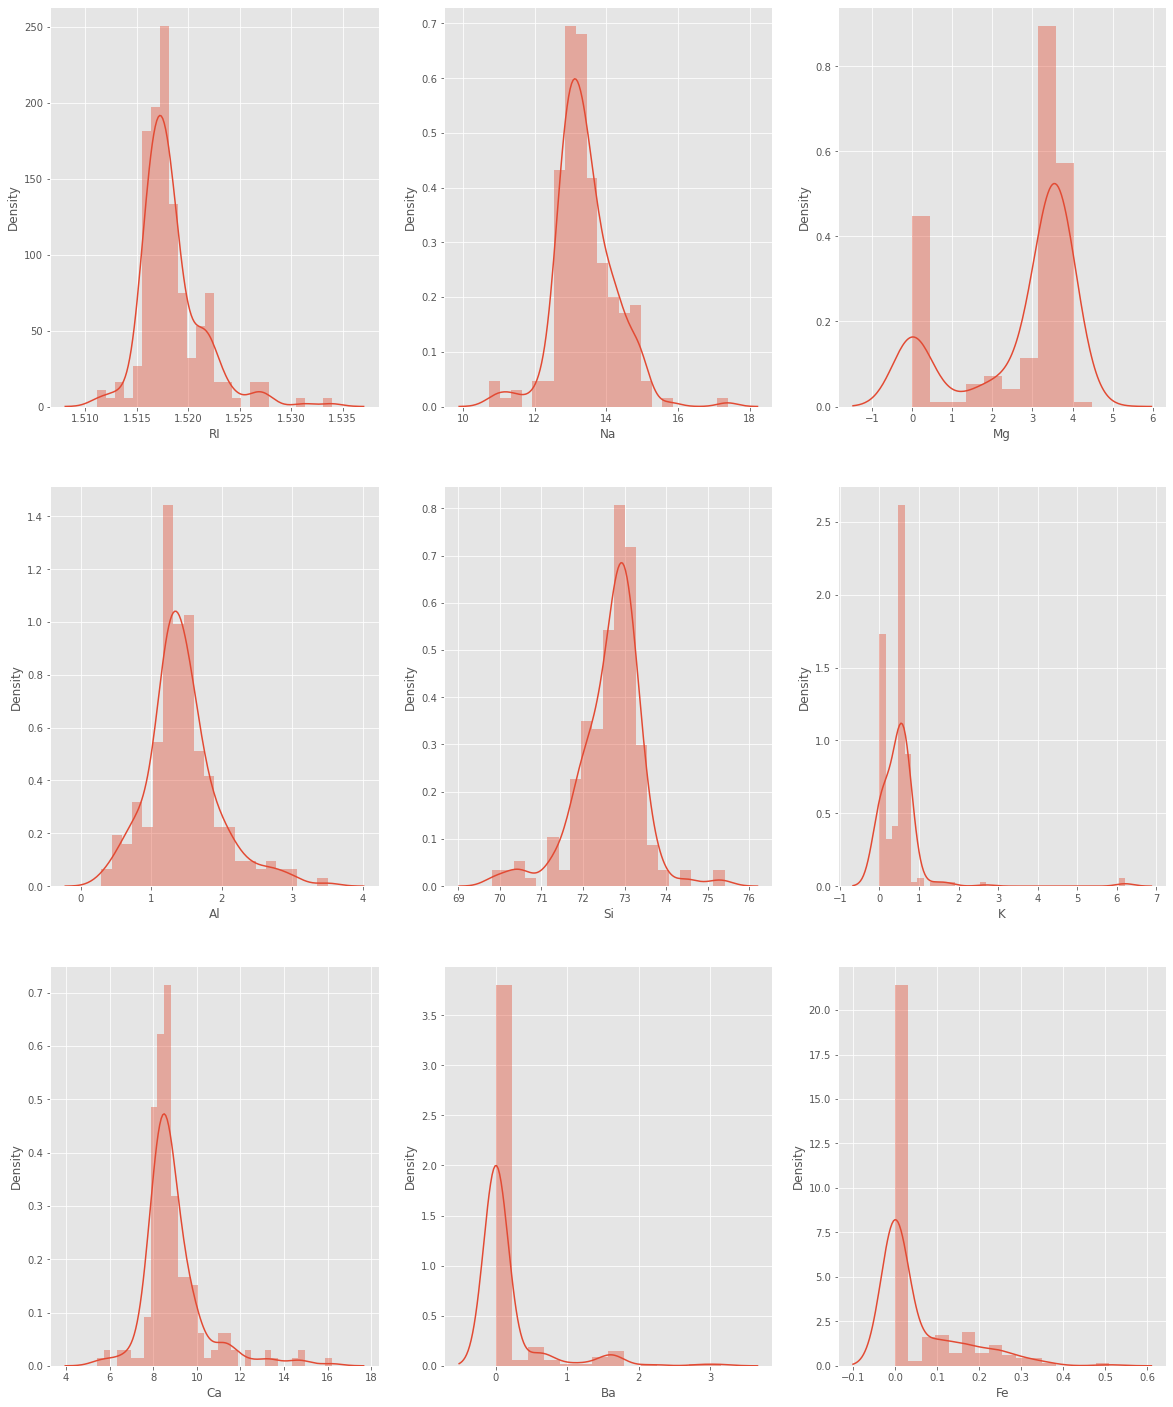

In [29]:
plt.style.use("ggplot")
fig, ax = plt.subplots(3,3, figsize = (20,25)) 

sns.distplot(df['RI'], ax = ax[0,0])
sns.distplot(df['Na'], ax = ax[0,1])
sns.distplot(df['Mg'], ax = ax[0,2])

sns.distplot(df['Al'], ax = ax[1,0])
sns.distplot(df['Si'], ax = ax[1,1])
sns.distplot(df['K'],  ax = ax[1,2])

sns.distplot(df['Ca'], ax = ax[2,0])
sns.distplot(df['Ba'], ax = ax[2,1])
sns.distplot(df['Fe'], ax = ax[2,2])
plt.show()


<AxesSubplot:>

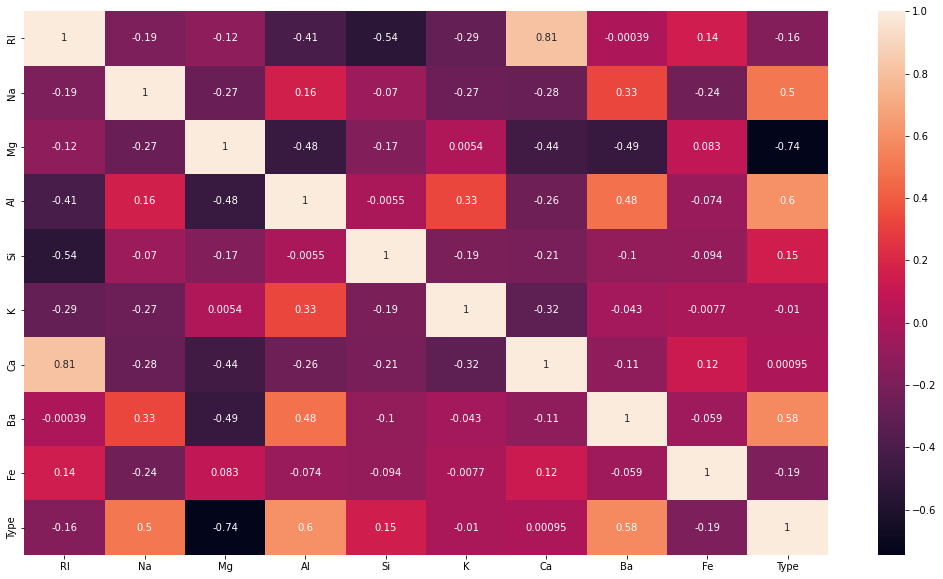

In [10]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

## Training and Testing Data Split

In [12]:
x = df.iloc[:,0:-1]
y = df['Type']

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

## Model Building

### Selecting best value for K

In [14]:
trainac = []
testac = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    trainac.append(knn.score(xtrain, ytrain))
    testac.append(knn.score(xtest, ytest))

Text(0, 0.5, 'accuracy')

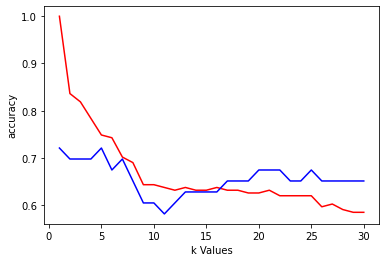

In [16]:
plt.plot(range(1,31), trainac, color = 'r')
plt.plot(range(1,31), testac, color = 'b')
plt.xlabel("k Values")
plt.ylabel('accuracy')

Here, k = 7

In [23]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

In [24]:
print(knn.score(xtrain, ytrain))
print(knn.score(xtest, ytest))

0.7017543859649122
0.6976744186046512


In [25]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.67      0.84      0.74        19
           2       0.73      0.67      0.70        12
           3       0.00      0.00      0.00         6
           5       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.70        43
   macro avg       0.62      0.75      0.66        43
weighted avg       0.62      0.70      0.65        43



<AxesSubplot:>

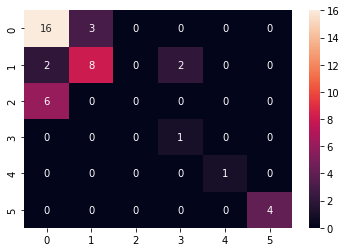

In [26]:
sns.heatmap(confusion_matrix(ytest, ypred), annot= True)

In [27]:
pred_df = pd.DataFrame({'Actual' : ytest, 'Predicted' : ypred})
pred_df

,Actual,Predicted
108,2,5
206,7,7
106,2,2
107,2,2
51,1,1
33,1,1
59,1,2
152,3,1
4,1,2
31,1,1


#### Conclusion 
The accuracy of the model is 95.23%

## End